In [1]:
import numpy as np 
import pandas as pd
from functools import reduce

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
dfevent = pd.read_csv(r"~\Downloads\telstra_recruiting_network\event_type.csv")
dflog = pd.read_csv(r"~\Downloads\telstra_recruiting_network\log_feature.csv")
dfresource = pd.read_csv(r"~\Downloads\telstra_recruiting_network\resource_type.csv")
dfsubmission = pd.read_csv(r"~\Downloads\telstra_recruiting_network\sample_submission.csv")
dftest = pd.read_csv(r"~\Downloads\telstra_recruiting_network\test.csv")
dftrain = pd.read_csv(r"~\Downloads\telstra_recruiting_network\train.csv")

In [3]:
df = [dftrain,dfevent, dflog, dfresource]

In [9]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
id                7381 non-null int64
location          7381 non-null object
fault_severity    7381 non-null int64
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


In [7]:
df1 = reduce(lambda left,right: pd.merge(left,right,on='id',how='left'), df)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 7 columns):
id                61839 non-null int64
location          61839 non-null object
fault_severity    61839 non-null int64
event_type        61839 non-null object
log_feature       61839 non-null object
volume            61839 non-null int64
resource_type     61839 non-null object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


In [18]:

dg = dfevent.groupby('id').aggregate('count').astype('category')

In [34]:
dfevent.head()

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [67]:
df1.fault_severity = df1['fault_severity'].astype('category')
df1.volume = df1['volume'].astype('int32')
df1.location = df1['location'].astype('category')
df1.event_type = df1['event_type'].astype('category')
df1.log_feature = df1['log_feature'].astype('category')
df1.resource_type = df1['resource_type'].astype('category')

In [68]:
dfevent

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 7 columns):
id                61839 non-null int64
location          61839 non-null category
fault_severity    61839 non-null category
event_type        61839 non-null category
log_feature       61839 non-null category
volume            61839 non-null int32
resource_type     61839 non-null category
dtypes: category(5), int32(1), int64(1)
memory usage: 1.7 MB


C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


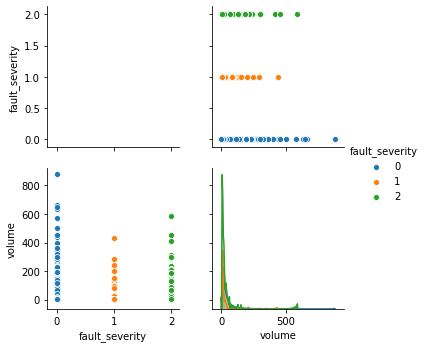

In [90]:
sns.pairplot(data=df1.drop(['id'],axis=1), hue="fault_severity")

In [98]:
df1.event_type.unique 
df1.log_feature.unique  
df1.resource_type.unique
df1.location.unique

<bound method Series.unique of 0        location 118
1        location 118
2        location 118
3        location 118
4         location 91
             ...     
61834      location 7
61835      location 7
61836    location 885
61837    location 885
61838    location 885
Name: location, Length: 61839, dtype: category
Categories (929, object): [location 1, location 10, location 100, location 1000, ..., location 995, location 996, location 998, location 999]>

In [120]:
x_category = ['location','event_type','log_feature','resource_type']
x_numerical = ['volume']
target = ['fault_severity']

In [132]:
dfX = df1[x_category]

In [133]:
le = preprocessing.LabelEncoder()
for i in range(len(dfX.columns)):
    dfX.iloc[:,i]=le.fit_transform(dfX.iloc[:,i])

In [137]:
df1.head()

,id,location,fault_severity,event_type,log_feature,volume,resource_type
0,14121,location 118,1,event_type 34,feature 312,19,resource_type 2
1,14121,location 118,1,event_type 34,feature 232,19,resource_type 2
2,14121,location 118,1,event_type 35,feature 312,19,resource_type 2
3,14121,location 118,1,event_type 35,feature 232,19,resource_type 2
4,9320,location 91,0,event_type 34,feature 315,200,resource_type 2
